# Analysis of P Network Model

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import math
import seaborn as sns
import powerlaw
import community
from IPython.display import Image, display

cleaned_data_path = "cleaned_data"
networks_path = "networks"

In [2]:
# reading the network
BGNetP = nx.read_gml(f"{networks_path}/BGNetP.gml")

In [3]:
# Iterate through the edges and update the 'weight' attribute to be of type int
for u, v, attr in BGNetP.edges(data=True):
    attr['weight'] = int(attr['weight'])


# Basic Network Features

In [4]:
density = nx.density(BGNetP)
print(f'Network Density: {round(density, 4)}')

Network Density: 0.0336


Comment: The network is vary sparse.

In [57]:
# links per node
links_per_node = len(BGNetP.edges())/len(BGNetP.nodes())
print(f'Links per node: {round(links_per_node, 4)}')

Links per node: 52.4457


6) What is the average distance for the network? What is the diameter of the network?

In [5]:
avg_dist = nx.average_shortest_path_length(BGNetP)
print(f'Average distance: {round(avg_dist, 2)}')

Average distance: 2.95


In [6]:
diameter = nx.diameter(BGNetP)
print(f'Network Diameter: {diameter}')

Network Diameter: 7


7) How connected and centralized this network is? What is the number of connected components and what are their sizes? Is there a giant component?

In [7]:
print(f'Is connected: {nx.is_connected(BGNetP)}')
print(f'Number of connected components: {nx.number_connected_components(BGNetP)}')

Is connected: True
Number of connected components: 1


8) What are the average and the global clustering coefficients? Show the distribution of local clustering coefficient of network's nodes. Is clustering strong or not? Answer by comparing with randomly generated Erdos-Renyi and scale free networks of the same dimension.

In [8]:
average_clustering = nx.average_clustering(BGNetP, weight='weight')
print(f'Average clustering coefficient: {round(average_clustering, 4)}')

Average clustering coefficient: 0.0639


In [9]:
global_clustering = nx.transitivity(BGNetP)
# closed_triplets = sum(nx.triangles(BGNetP).values()) // 3
# all_possible_triplets = math.comb(len(BGNetP.nodes), 3)
# global_clustering = closed_triplets/all_possible_triplets
print(f'Global clustering coefficient: {round(global_clustering, 3)}')

Global clustering coefficient: 0.468


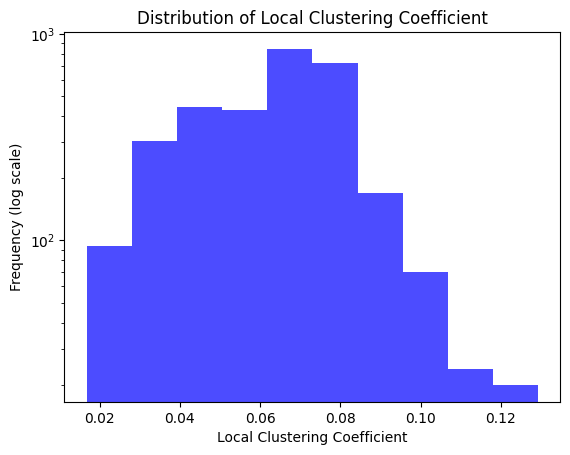

In [10]:
# Plotting the distribtion of clustering coefficients
clustering = nx.clustering(BGNetP, weight="weight")
values = list(clustering.values())

# create a histogram
plt.hist(values, bins=10, alpha=0.7, color='blue')
# log scale for y axis
plt.yscale('log')

plt.xlabel('Local Clustering Coefficient')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Local Clustering Coefficient')

# Show the plot
plt.show()

comment: The distribution of local node clustering coefficient appears to be more normal compared to network L.

In [11]:
# calculate the edge creation probabiliy needed for Erdos-Renyi model
number_of_nodes = BGNetP.number_of_nodes()
num_of_edges = BGNetP.number_of_edges()
n = BGNetP.number_of_nodes()
m = BGNetP.number_of_edges()
p = ( 2*float(m) ) / ( n* (n-1) )
potential_num_of_edges = num_of_edges*(num_of_edges-1)/2
edge_creation_probability = num_of_edges/potential_num_of_edges

In [12]:
# Erdos-Renyi and scale free models
NetER = nx.erdos_renyi_graph(number_of_nodes, p)
NetSFMulti = nx.scale_free_graph(number_of_nodes)
NetSF = nx.DiGraph()
for i, j in NetSFMulti.edges():
    if not NetSF.has_edge(i, j):
        NetSF.add_edge(i, j, weight=1)
    else:
        NetSF[i][j]['weight'] += 1

In [13]:
average_clustering_ER = nx.average_clustering(NetER)
average_clustering_SF = nx.average_clustering(NetSF)
print(f'Erdos Renyi Average Clustering Coefficient: {round(average_clustering_ER, 5)}')
print(f'Scale Free Average Clustering Coefficient: {round(average_clustering_SF, 3)}')

Erdos Renyi Average Clustering Coefficient: 0.03358
Scale Free Average Clustering Coefficient: 0.102


comment: Clustering is weak since the network has similar average clustering coefficient as Erdos Renyi model.

9) Based on the answers from 6. and 8. determine whether this network represents a small-world network.

comment: Since global clustering coefficient is high and average distance between nodes is small compared to the size of network, this network **does** represent a small-world network.

10. Conduct assortativity analysis by node degree and answer whether assortative mixing is expressed. Give visualisation as well.

Assortativity measures the similarity of connections in the graph with respect to the node degree. <br>
Here, I have used the overall node degree (both in and out connections are calculated).

In [14]:
degree_assortativity = nx.degree_pearson_correlation_coefficient(BGNetP)
print(f"Degree Assortativity Coefficient: {degree_assortativity:.2f}")
degree_assortativity = nx.degree_pearson_correlation_coefficient(BGNetP, weight='weight')
print(f"Weighted Degree Assortativity Coefficient: {degree_assortativity:.2f}")

Degree Assortativity Coefficient: 0.10
Weighted Degree Assortativity Coefficient: 0.03


comment: Because of low weighted and non-weighted assortativity coefficient, it is safe to say that the network is not assortative.

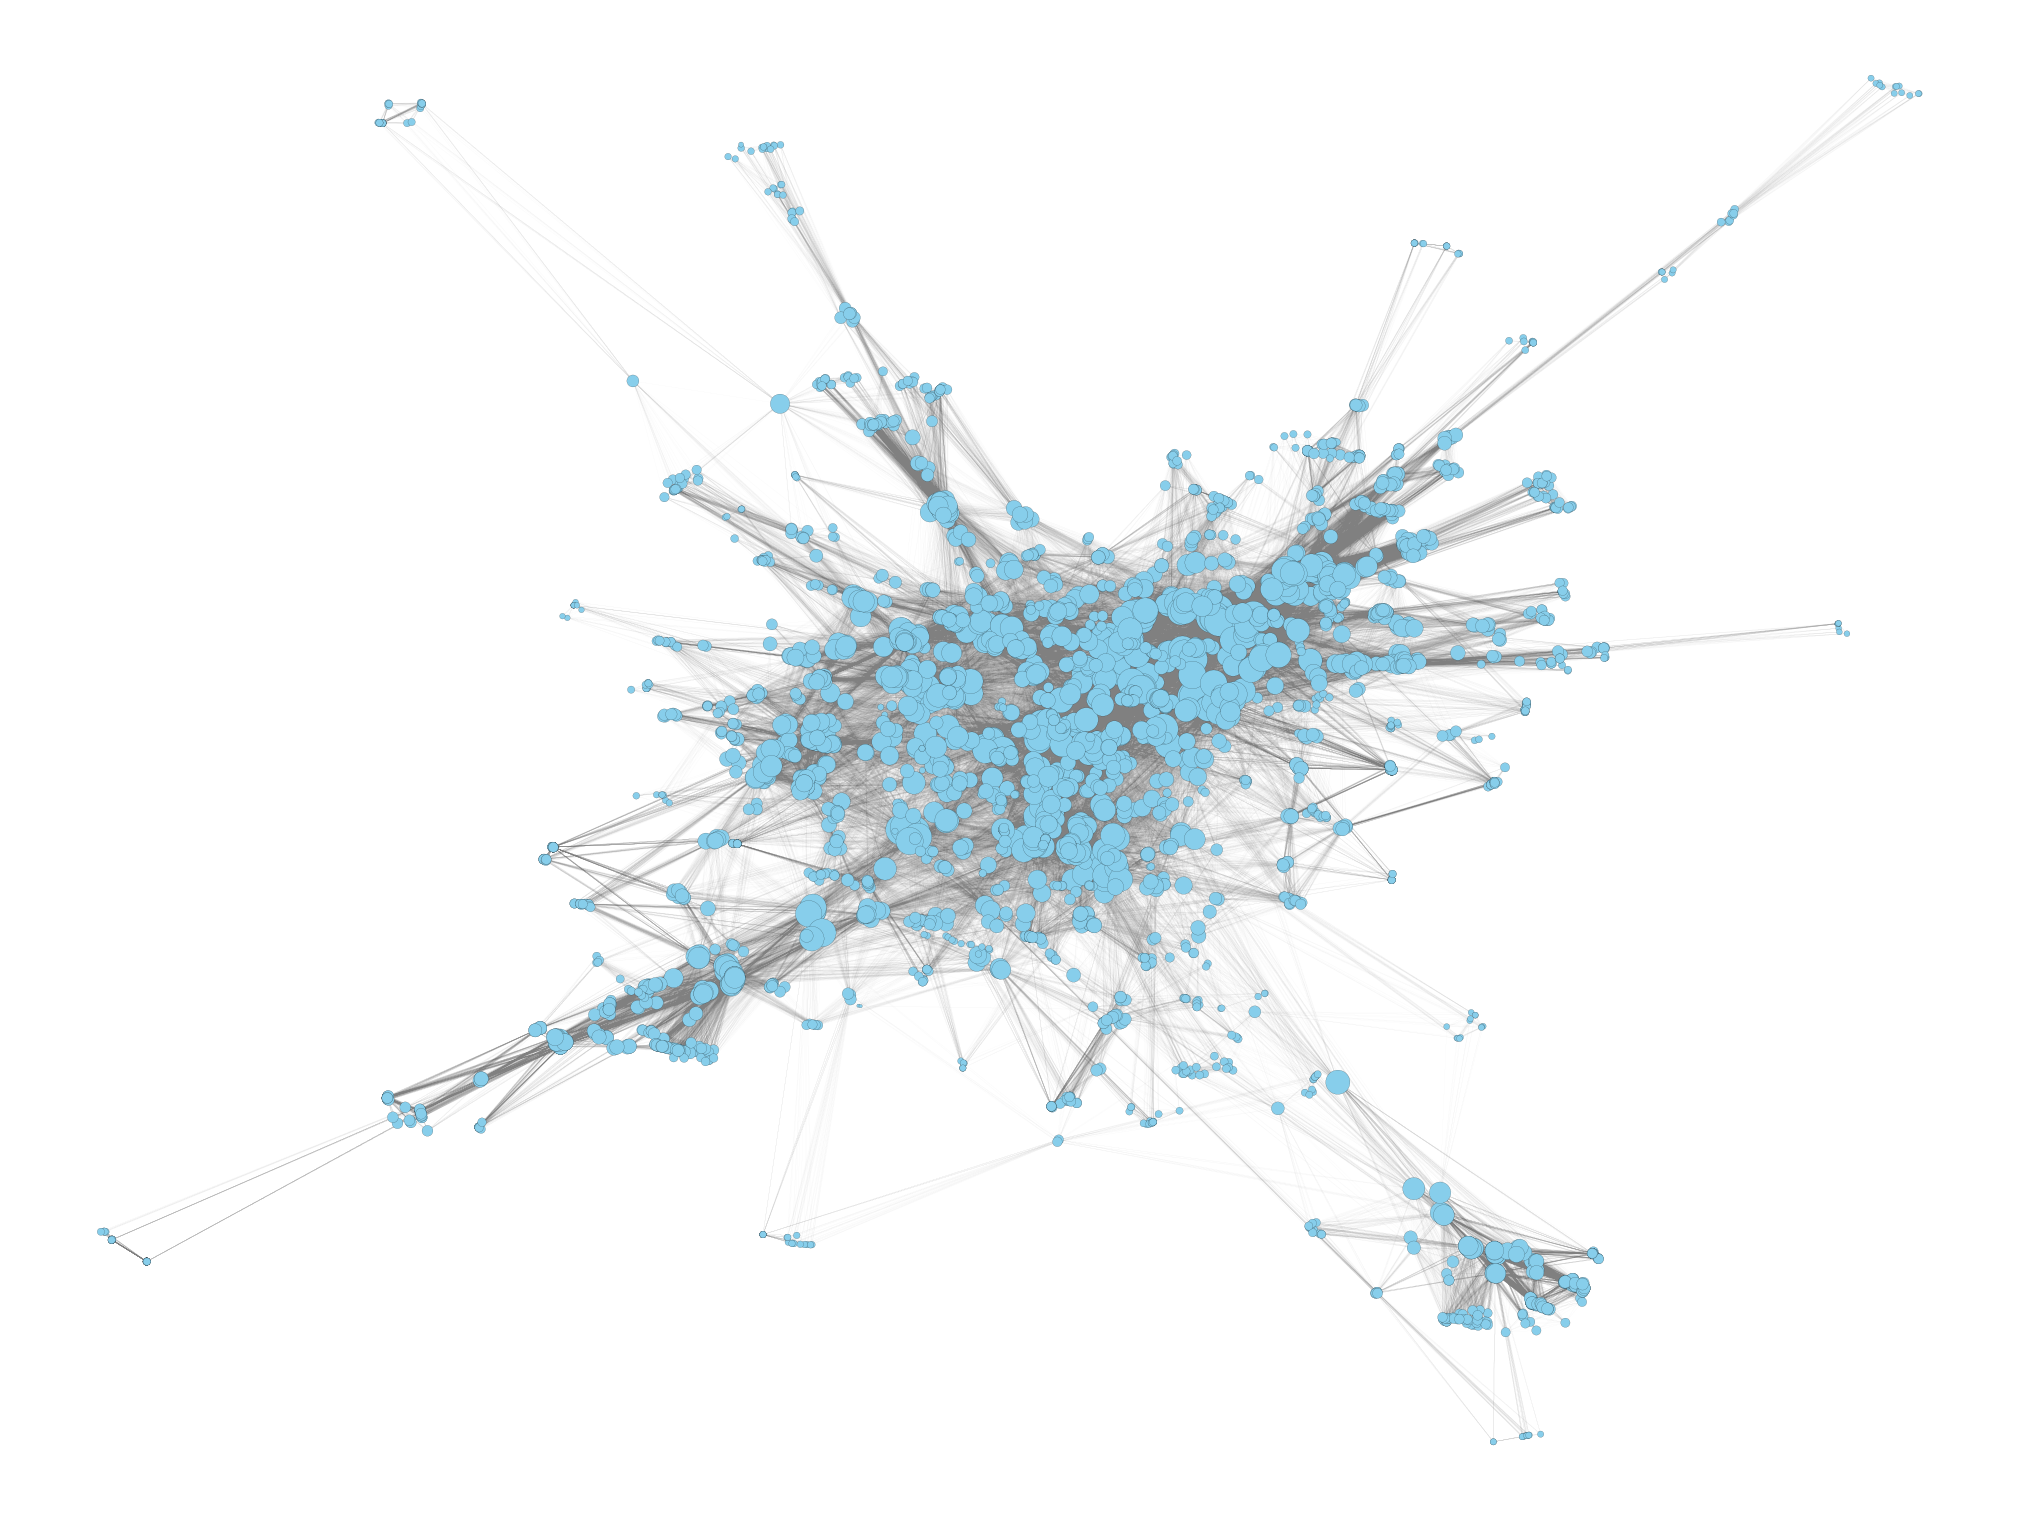

In [15]:
# Plot network; each node's size is propotional to the sqare of its degree; this is because we want to check assortativity
degrees = dict(BGNetP.degree())

node_sizes = [ degrees[node] for node in BGNetP.nodes()]

node_positions = {node: (BGNetP.nodes[node]['stop_lon'], BGNetP.nodes[node]['stop_lat']) for node in BGNetP.nodes()}

plt.figure(figsize=(20, 15)) 
pos = nx.spring_layout(BGNetP)
nx.draw(BGNetP, pos=pos, with_labels=False, width=0.01, edgecolors='black', linewidths=0.1, node_size=node_sizes, node_color='skyblue', edge_color='grey', arrows=False)

plt.margins(0, 0)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


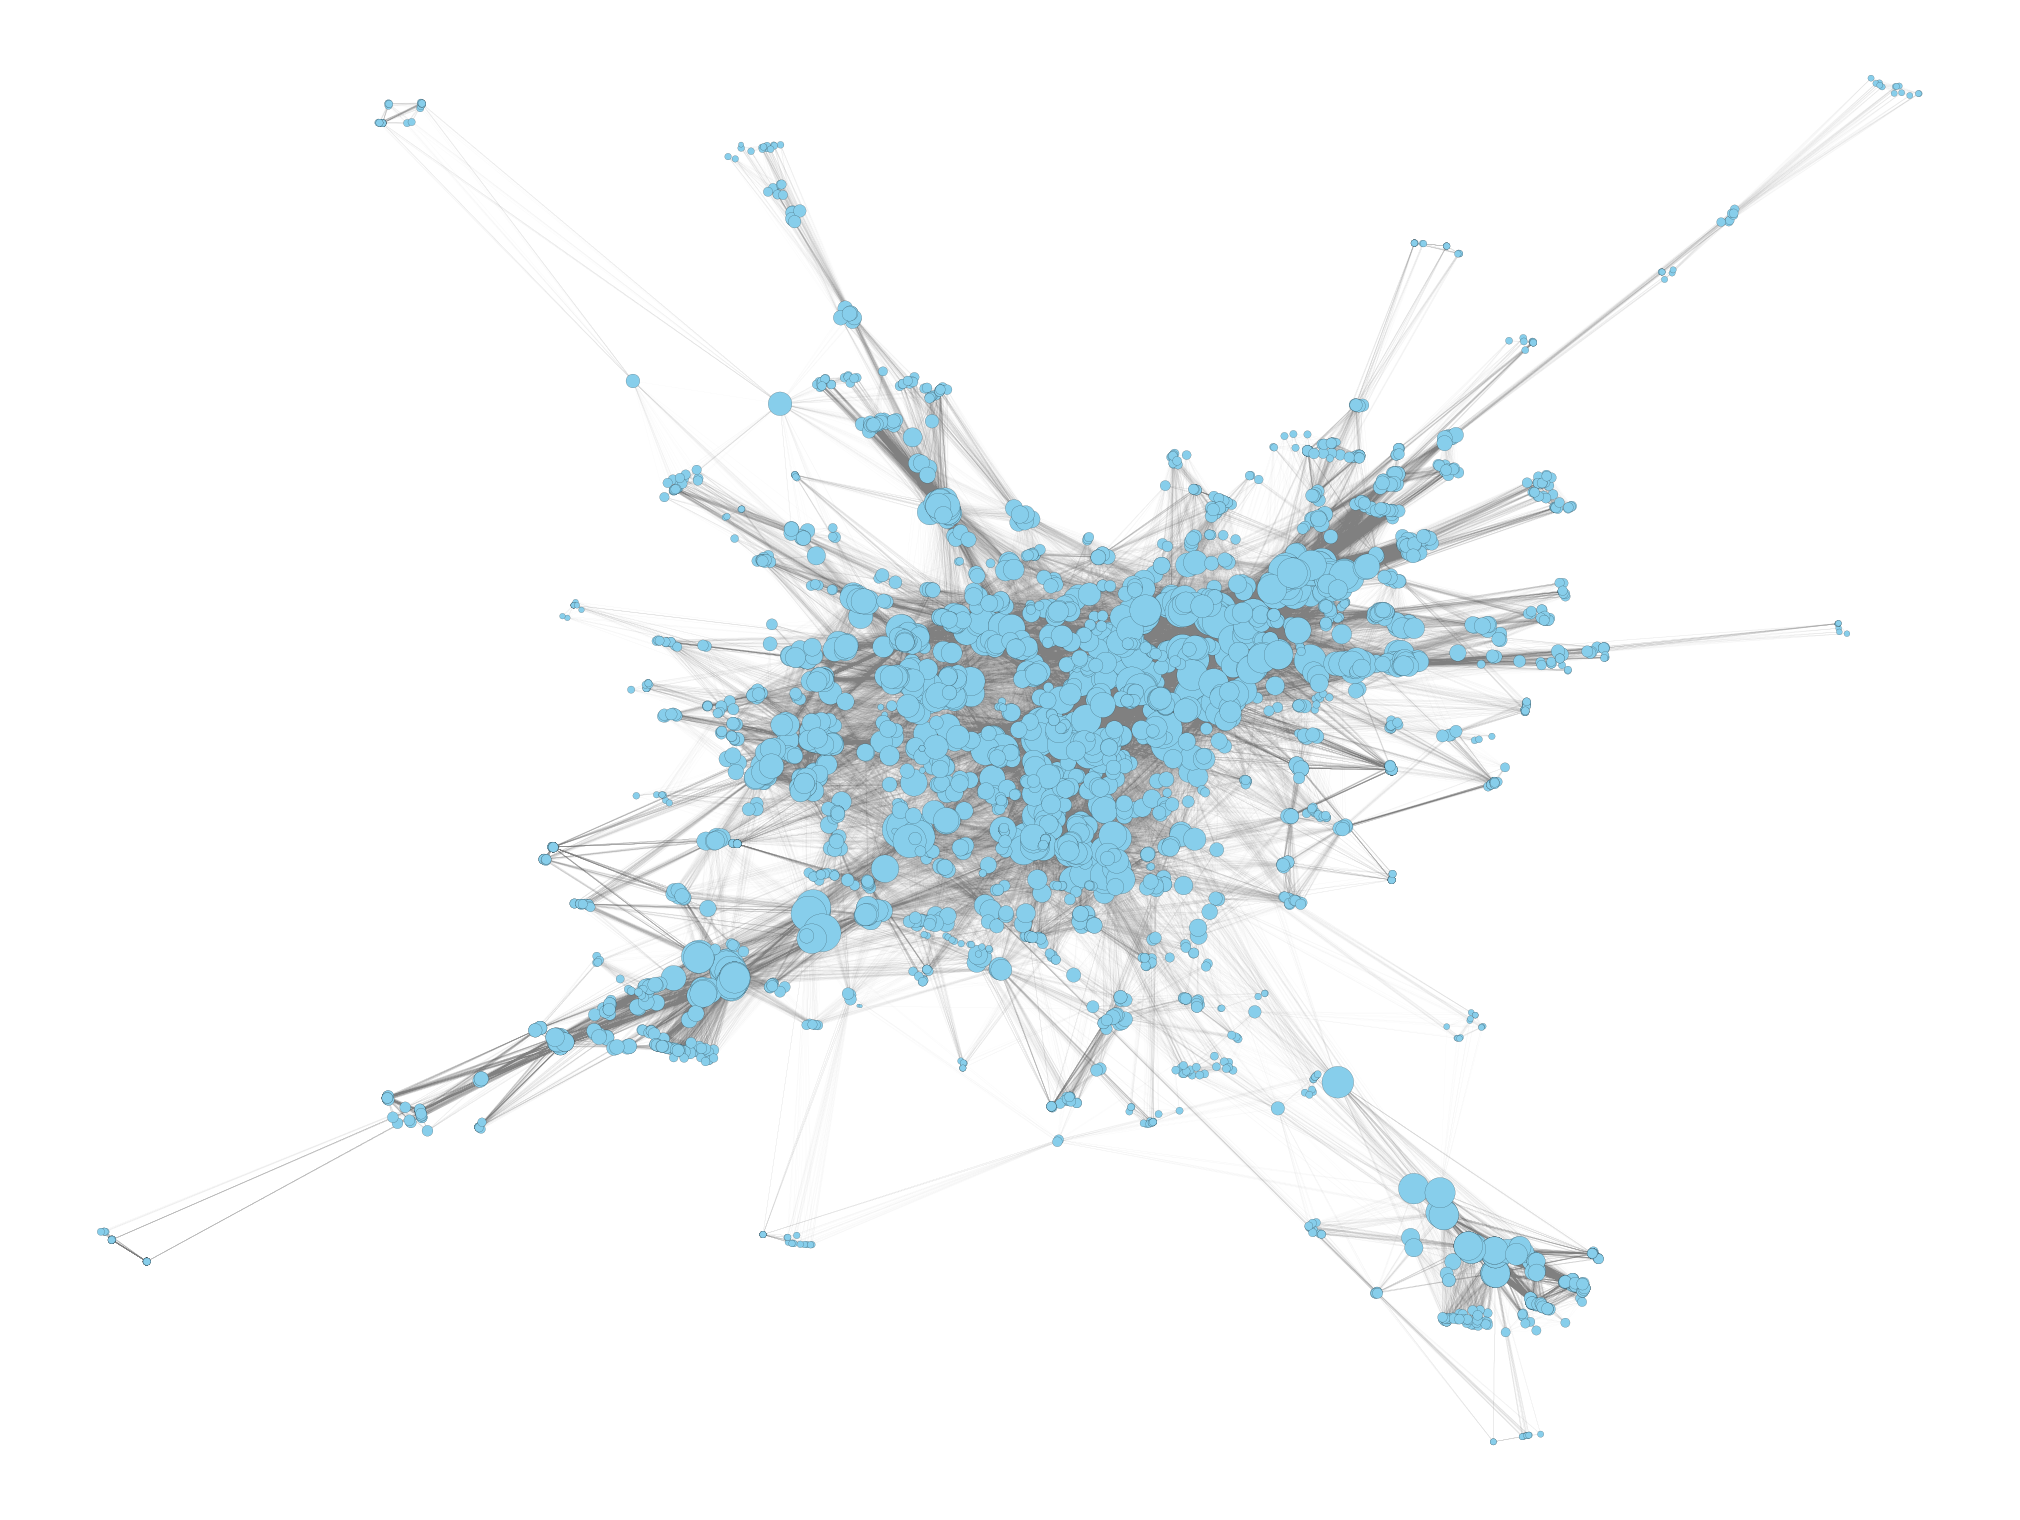

In [16]:
# Plot network; WEIGHTED DEGREE ;each node's size is propotional to the its degree; this is because we want to check assortativity
degrees = dict(BGNetP.degree(weight='weight'))

node_sizes = [ degrees[node] for node in BGNetP.nodes()]

node_positions = {node: (BGNetP.nodes[node]['stop_lon'], BGNetP.nodes[node]['stop_lat']) for node in BGNetP.nodes()}

plt.figure(figsize=(20, 15)) 
# pos = nx.kamada_kawai_layout(BGNetP)
nx.draw(BGNetP, pos=pos, with_labels=False, width=0.01, edgecolors='black', linewidths=0.1, node_size=node_sizes, node_color='skyblue', edge_color='grey', arrows=False)

plt.margins(0, 0)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


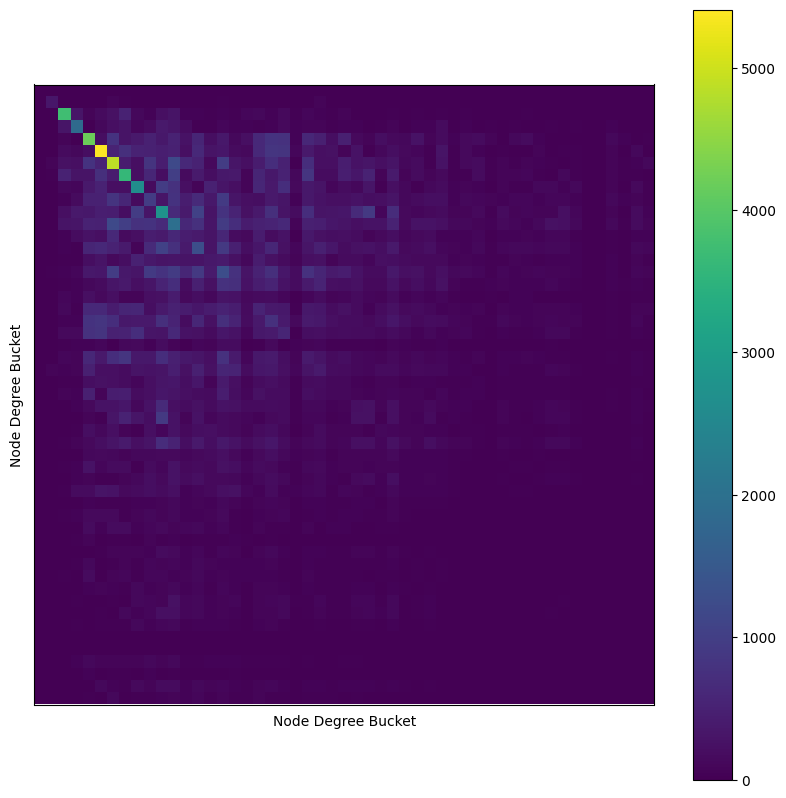

In [17]:
# Plotting a heatmap that will show node assortativity
degrees = dict(BGNetP.degree())
for key in degrees:
    degrees[key] = degrees[key] // 10
max_degree = max(degrees.values())
min_degree = min(degrees.values())

degree_matrix = np.zeros((max_degree - min_degree + 1, max_degree - min_degree + 1), dtype=int)

for node, degree in degrees.items():
    neighbors_of_node = list(BGNetP.neighbors(node))
    for neighbor in neighbors_of_node:
        degree1 = BGNetP.degree(neighbor) // 10
        degree_matrix[degree-min_degree][degree1-min_degree]+=1

plt.figure(figsize=(10, 10))
plt.imshow(degree_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel("Node Degree Bucket")
plt.ylabel("Node Degree Bucket")
plt.show()

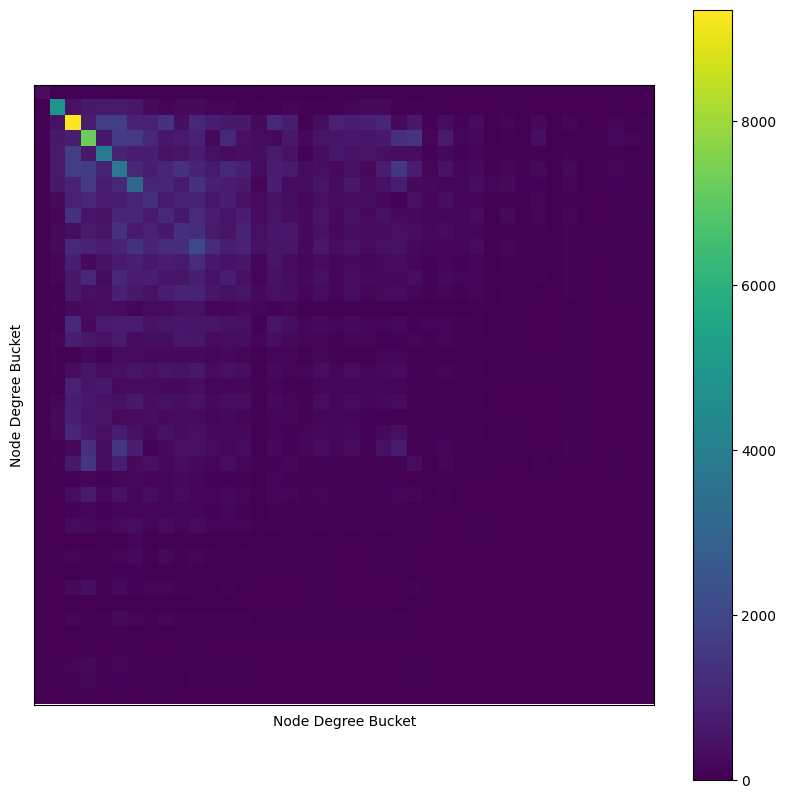

In [18]:
# Plotting a heatmap that will show node assortativity
degrees = dict(BGNetP.degree(weight='weight'))
for key in degrees:
    degrees[key] = degrees[key] // 20
max_degree = max(degrees.values())
min_degree = min(degrees.values())

degree_matrix = np.zeros((max_degree - min_degree + 1, max_degree - min_degree + 1), dtype=int)

for node, degree in degrees.items():
    neighbors_of_node = list(BGNetP.neighbors(node))
    for neighbor in neighbors_of_node:
        degree1 = BGNetP.degree(neighbor, weight='weight') // 20
        degree_matrix[degree-min_degree][degree1-min_degree]+=1

plt.figure(figsize=(10, 10))
plt.imshow(degree_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel("Node Degree Bucket")
plt.ylabel("Node Degree Bucket")
plt.show()

11. Does the network show <i>rich club phenomenon</i>? <br>
The "rich-club phenomenon" in a network refers to the tendency of nodes with a high degree (number of connections) to be more densely connected to each other than what would be expected by random chance. <br>In other words, it suggests that nodes with a higher degree are more likely to form interconnected subgraphs or "clubs."

In [19]:
# In order to use rich_club_coefficient function from NetworkX, we first have to transform the network to undirected
BGNetP_undirected = BGNetP.to_undirected()

In [58]:
nx.rich_club_coefficient(BGNetP_undirected, normalized=True)

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0000061098178663,
 7: 1.0000061098178663,
 8: 1.0000061098178663,
 9: 1.0000061098178663,
 10: 1.0000061098178663,
 11: 1.0000061098178663,
 12: 1.0000061098178663,
 13: 1.0000061098178663,
 14: 1.0000061103405293,
 15: 1.0000061103405293,
 16: 1.0000061103405293,
 17: 1.000281367937512,
 18: 1.0005020664319606,
 19: 1.0009811255963403,
 20: 1.0014684197591546,
 21: 1.0020027113630763,
 22: 1.0023050160362377,
 23: 1.0047131581900477,
 24: 1.005339802789953,
 25: 1.005347727372233,
 26: 1.0063981414623426,
 27: 1.0075573583310728,
 28: 1.0122903384638995,
 29: 1.0124278085822949,
 30: 1.0126474139924462,
 31: 1.0126765361943393,
 32: 1.0126751596452757,
 33: 1.0136162025708735,
 34: 1.0164344733882449,
 35: 1.018303615407349,
 36: 1.0197870206645379,
 37: 1.0197870206645379,
 38: 1.0197870206645379,
 39: 1.0200966068340391,
 40: 1.020729740178369,
 41: 1.0225637429108982,
 42: 1.0230272966306146,
 43: 1.0239279564896555,
 44: 

comment: For some reason, this function returns division by zero. I will write my own.

In [21]:
degrees = dict(BGNetP.degree(weight='weight'))
max_degree = max(degrees.values())
max_degree

787

comment: Based on the max weighted node degree, which is 787, I chose 650 as a threshold for a 'high degree'

In [22]:
results = {}
# Iterate through nodes and get those with high degrees
node_degree = 650
nodes_with_high_degree = [node for node in BGNetP.nodes() if BGNetP.degree(node, weight='weight') > node_degree]
num_nodes = len(nodes_with_high_degree)
# Calculate the number of edges between nodes with high degree
edge_count = 0
for node1 in nodes_with_high_degree:
    for node2 in nodes_with_high_degree:
        if node1 < node2 and BGNetP.has_edge(node1, node2):
            edge_count += 1

# Calculate rich club coefficient
rich_club_coeff = 2*edge_count/(num_nodes*(num_nodes-1))

print(f"Rich Club Coefficient for nodes with weighted degree > {node_degree}: {rich_club_coeff:.3f}")


Rich Club Coefficient for nodes with weighted degree > 650: 0.436


comment: Rich club coefficient is pretty high (near 0.5), so it appears that the network **does** show the rich club fenomenon at some extent.

12. <i>Core-periphery</i> model <br>
 Analyze positions based on the tariff zone to which they belong. Examine whether BGNetL and BGNetP
the networks correspond to the core-periphery model. <br> Consider the first zone 
the core, and the rest as the periphery.

In [23]:
periphery_nodes = nx.periphery(BGNetP)  # The periphery is the set of nodes with eccentricity equal to the diameter.

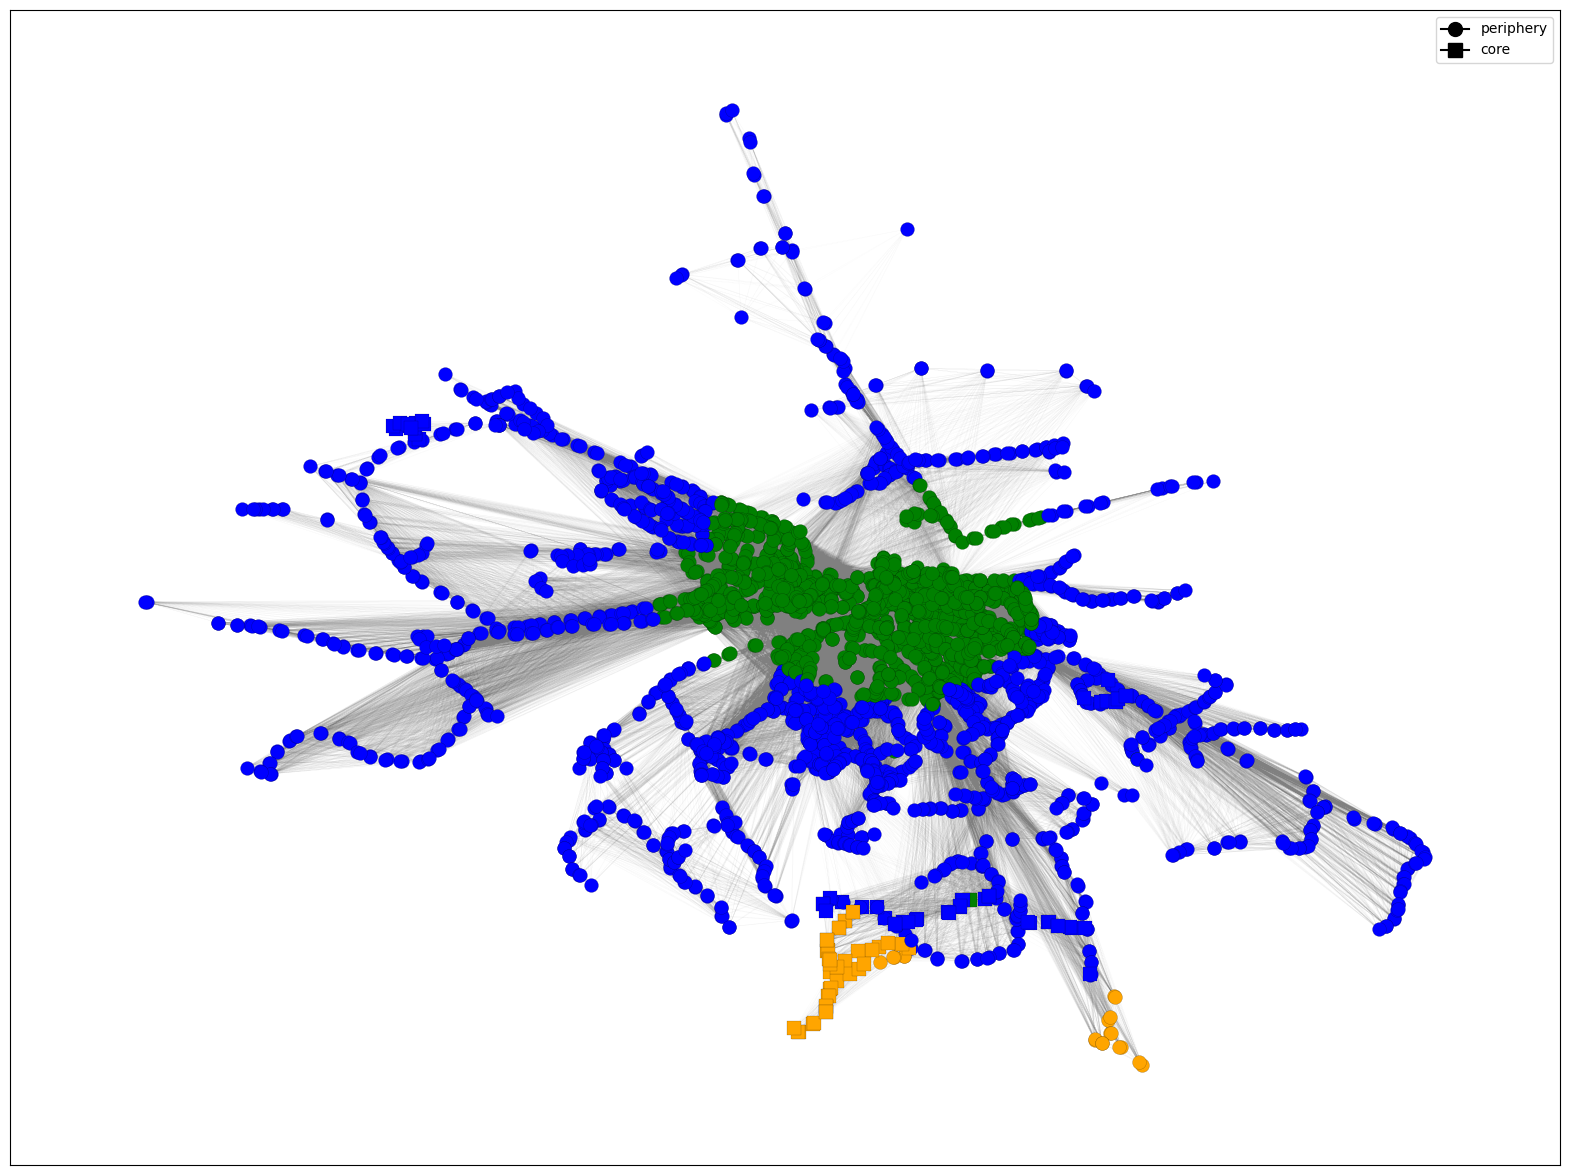

In [24]:
from matplotlib.lines import Line2D
# Plot network for core-periphery model
class_to_color = {
    1: 'green',
    2: 'blue',
    3: 'orange'
    # Add more colors if needed
}

type_to_marker = {
    'periphery': 'o',
    'core': 's'
}

node_positions = {node: (BGNetP.nodes[node]['stop_lon'], BGNetP.nodes[node]['stop_lat']) for node in BGNetP.nodes()}

node_shapes = ['o' if node in periphery_nodes else 's' for node in BGNetP.nodes()]

plt.figure(figsize=(20, 15)) 

for node, data in BGNetP.nodes(data=True):
    if node in periphery_nodes:
        marker = 's'
    else:
        marker = 'o'
    nx.draw_networkx_nodes(BGNetP, pos=node_positions, nodelist=[node], edgecolors='black', linewidths=0.1, node_size=100, node_color=class_to_color[data['zone_id']], node_shape=marker)

nx.draw_networkx_edges(BGNetP, node_positions, width=0.01, edge_color='gray')

legend_handles = [Line2D([0], [0], marker=type_to_marker[type], color='black', label=type, markersize=10) for type in type_to_marker.keys()]

plt.legend(handles=legend_handles, loc='upper right')

plt.show()


13. Node degree distribution? Does it follow <i>power law</i> distribution?

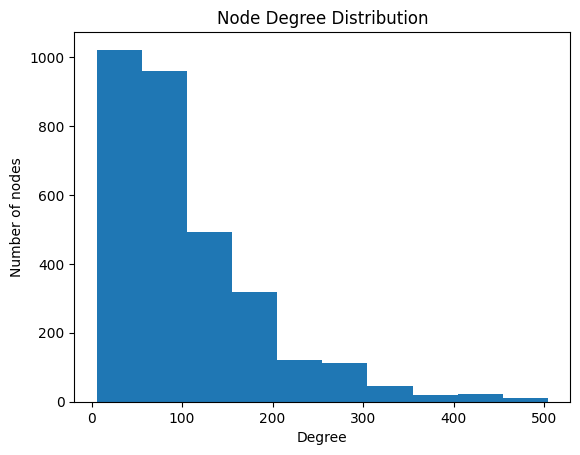

In [25]:
# Plot the histogram
degrees = dict(BGNetP.degree())

plt.hist(list(degrees.values()))

plt.xlabel('Degree')
# plt.yscale('log')
plt.ylabel('Number of nodes')
plt.title('Node Degree Distribution')

plt.show()

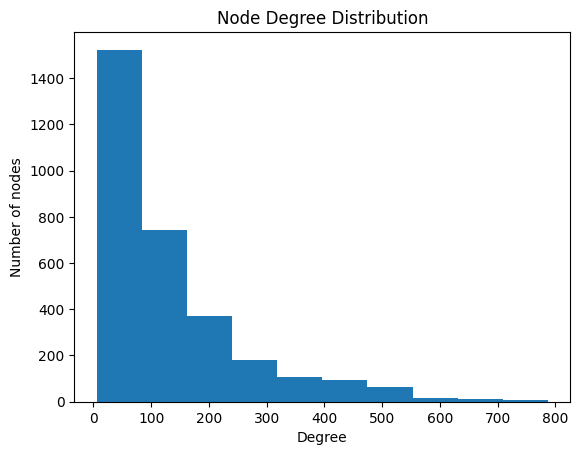

In [26]:
# Plot the histogram; weighted degrees
degrees = dict(BGNetP.degree(weight='weight'))

plt.hist(list(degrees.values()))

plt.xlabel('Degree')
# plt.yscale('log')
plt.ylabel('Number of nodes')
plt.title('Node Degree Distribution')

plt.show()

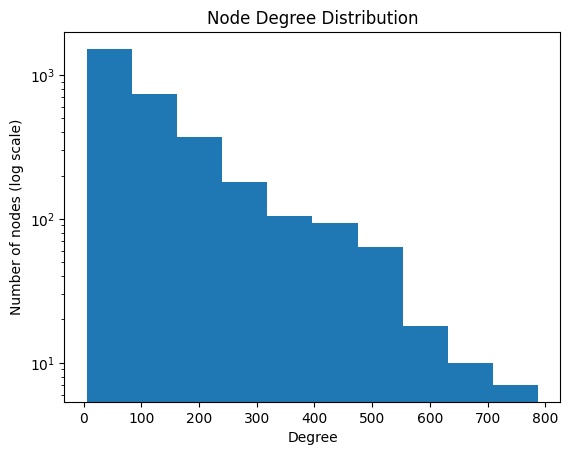

In [27]:
# Plot the histogram; weighted degrees
degrees = dict(BGNetP.degree(weight='weight'))

plt.hist(list(degrees.values()))

plt.xlabel('Degree')
plt.yscale('log')
plt.ylabel('Number of nodes (log scale)')
plt.title('Node Degree Distribution')

plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


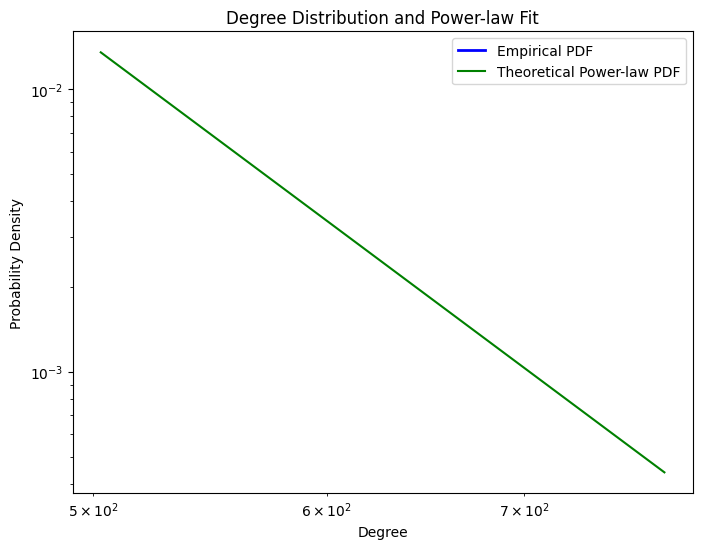

In [28]:

# Calculate node degrees
degree_sequence = sorted([d for n, d in BGNetP.degree(weight='weight')], reverse=True)
degree_sequence = [d-min(degree_sequence) for d in degree_sequence]

# Fit a power-law distribution using the powerlaw package
fit = powerlaw.Fit(degree_sequence)

# Create a new figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot the empirical PDF
fit.plot_pdf(color='b', linewidth=2, ax=ax, label='Empirical PDF')

# Plot the theoretical power-law PDF
fit.power_law.plot_pdf(color='g', ax=ax, label='Theoretical Power-law PDF')

# Add title and legend
plt.title('Degree Distribution and Power-law Fit')
plt.legend()

# Add labels to the axes
plt.xlabel('Degree')
plt.ylabel('Probability Density')

# Show the plot
plt.show()

comment: The distribution is not exactly following power-law distribution.

# Centrality Analysis

14. Conduct centrality analyses by degree, closeness and betweenness centrality. Give an overview 
the most important nodes for each of them.

In [30]:
stops_df = pd.read_csv('cleaned_data/stops.csv')

#### Degree Centrality

In [31]:
degree_centrality = nx.degree_centrality(BGNetP)
degree_centrality = {int(key): value for key, value in degree_centrality.items()}
stops_df['degree_centrality'] = stops_df['stop_id'].map(degree_centrality)

In [59]:
stops_df.sort_values(by='degree_centrality', ascending=False).head(10)

stop_id                          stop_name   stop_lat   stop_lon  \
117      148                    Karađorđev Park  44.796975  20.465207   
118      149                    Karađorđev Park  44.798345  20.465707   
341      372                              Arhiv  44.826985  20.412041   
342      373          Bulevar Maršala Tolbuhina  44.829323  20.411607   
343      374          Bulevar Maršala Tolbuhina  44.829740  20.411115   
116      147  Trg Slavija /Bulevar Oslobođenja/  44.801439  20.466256   
472      503                      Ada Ciganlija  44.788531  20.420025   
465      496                              Sajam  44.796407  20.442099   
464      495                              Sajam  44.796518  20.441556   
373      404                    Go Novi Beograd  44.823398  20.412192   

     zone_id  degree_centrality  closeness_centrality  \
117        1           0.161538              0.453159   
118        1           0.161538              0.453159   
341        1           0.158974              0.457143   
342        1           0.158974              0.457143   
343        1           0.158974              0.457143   
116        1           0.157372              0.450542   
472        1           0.153846              0.456808   
465        1           0.153526              0.443875   
464        1           0.153526              0.443875   
373        1           0.151603              0.447055   

     weighted_closeness_centrality  betweenness_centrality  \
117                       0.433996                0.013958   
118                       0.432552                0.013958   
341                       0.439684                0.009128   
342                       0.439560                0.009128   
343                       0.439684                0.009128   
116                       0.431058                0.012895   
472                       0.437956                0.015221   
465                       0.423568                0.016914   
464                       0.423280                0.016914   
373                       0.430880                0.009229   

     weighted_betweenness_centrality  eigenvector_centrality  \
117                         0.011885                0.069761   
118                         0.011036                0.072949   
341                         0.008198                0.020338   
342                         0.008015                0.020580   
343                         0.008198                0.020338   
116                         0.010799                0.072420   
472                         0.013634                0.018469   
465                         0.014133                0.017142   
464                         0.013179                0.015170   
373                         0.008408                0.018116   

     composite_centrality  
117              0.494660  
118              0.497965  
341              0.377989  
342              0.378648  
343              0.377989  
116              0.488587  
472              0.433582  
465              0.445993  
464              0.432523  
373              0.358554

#### Closeness Centrality

In [33]:
closeness_centrality = nx.closeness_centrality(BGNetP)
closeness_centrality = {int(key): value for key, value in closeness_centrality.items()}
stops_df['closeness_centrality'] = stops_df['stop_id'].map(closeness_centrality)

In [60]:
stops_df.sort_values(by='closeness_centrality', ascending=False).head(10)

stop_id            stop_name   stop_lat   stop_lon  zone_id  \
761       793              Blok 70  44.804380  20.393566        1   
763       795  Omladinskih Brigada  44.804683  20.398083        1   
760       792              Blok 70  44.804076  20.393978        1   
758       790            Gandijeva  44.803420  20.389002        1   
1225     1261              Blok 42  44.804110  20.416077        1   
151       182   Škola Josif Pančić  44.781543  20.417767        1   
155       186             Kijevska  44.775925  20.413782        1   
153       184         Dom Zdravlja  44.779142  20.415902        1   
154       185             Kijevska  44.775390  20.413552        1   
150       181   Škola Josif Pančić  44.781039  20.417135        1   

      degree_centrality  closeness_centrality  weighted_closeness_centrality  \
761            0.135256              0.486512                       0.471370   
763            0.135256              0.486512                       0.471370   
760            0.135256              0.486512                       0.471370   
758            0.135256              0.486512                       0.471370   
1225           0.108974              0.472012                       0.460041   
151            0.130128              0.469102                       0.450802   
155            0.130128              0.469102                       0.450802   
153            0.130128              0.469102                       0.450802   
154            0.125000              0.467977                       0.449762   
150            0.125000              0.467977                       0.449762   

      betweenness_centrality  weighted_betweenness_centrality  \
761                 0.008143                         0.009404   
763                 0.008143                         0.009404   
760                 0.008143                         0.009425   
758                 0.008143                         0.009425   
1225                0.004928                         0.005422   
151                 0.006623                         0.006528   
155                 0.006623                         0.006528   
153                 0.006623                         0.006528   
154                 0.005311                         0.005129   
150                 0.005311                         0.005129   

      eigenvector_centrality  composite_centrality  
761                 0.017248              0.363722  
763                 0.017248              0.363722  
760                 0.017236              0.363395  
758                 0.017236              0.363395  
1225                0.012662              0.312247  
151                 0.017971              0.367861  
155                 0.017971              0.367861  
153                 0.017971              0.367861  
154                 0.016839              0.349237  
150                 0.016839              0.349237

In [35]:
weighted_closeness_centrality = nx.closeness_centrality(BGNetP, distance='weight')
weighted_closeness_centrality = {int(key): value for key, value in weighted_closeness_centrality.items()}
stops_df['weighted_closeness_centrality'] = stops_df['stop_id'].map(weighted_closeness_centrality)

In [36]:
stops_df.sort_values(by='weighted_closeness_centrality', ascending=False).head(10)

stop_id            stop_name   stop_lat   stop_lon  zone_id  \
758       790            Gandijeva  44.803420  20.389002        1   
763       795  Omladinskih Brigada  44.804683  20.398083        1   
761       793              Blok 70  44.804380  20.393566        1   
760       792              Blok 70  44.804076  20.393978        1   
1225     1261              Blok 42  44.804110  20.416077        1   
151       182   Škola Josif Pančić  44.781543  20.417767        1   
155       186             Kijevska  44.775925  20.413782        1   
153       184         Dom Zdravlja  44.779142  20.415902        1   
152       183         Dom Zdravlja  44.777768  20.414476        1   
154       185             Kijevska  44.775390  20.413552        1   

      degree_centrality  closeness_centrality  weighted_closeness_centrality  
758            0.135256              0.486512                       0.471370  
763            0.135256              0.486512                       0.471370  
761            0.135256              0.486512                       0.471370  
760            0.135256              0.486512                       0.471370  
1225           0.108974              0.472012                       0.460041  
151            0.130128              0.469102                       0.450802  
155            0.130128              0.469102                       0.450802  
153            0.130128              0.469102                       0.450802  
152            0.125000              0.467977                       0.449762  
154            0.125000              0.467977                       0.449762

#### Betweenness Centrality

In [37]:
betweenness_centrality = nx.betweenness_centrality(BGNetP)
betweenness_centrality = {int(key): value for key, value in betweenness_centrality.items()}
stops_df['betweenness_centrality'] = stops_df['stop_id'].map(betweenness_centrality)

In [38]:
stops_df.sort_values(by='betweenness_centrality', ascending=False).head(5)

stop_id  stop_name   stop_lat   stop_lon  zone_id  degree_centrality  \
872      906  Ustanička  44.784878  20.517098        1           0.097756   
824      856    Paunova  44.760945  20.476977        1           0.130449   
876      910  Trošarina  44.761400  20.482889        1           0.101282   
465      496      Sajam  44.796407  20.442099        1           0.153526   
464      495      Sajam  44.796518  20.441556        1           0.153526   

     closeness_centrality  weighted_closeness_centrality  \
872              0.428630                       0.412589   
824              0.433333                       0.418006   
876              0.415612                       0.404617   
465              0.443875                       0.423568   
464              0.443875                       0.423280   

     betweenness_centrality  
872                0.092611  
824                0.034994  
876                0.021424  
465                0.016914  
464                0.016914

In [39]:
weighted_betweenness_centrality = nx.betweenness_centrality(BGNetP, weight='weight')
weighted_betweenness_centrality = {int(key): value for key, value in weighted_betweenness_centrality.items()}
stops_df['weighted_betweenness_centrality'] = stops_df['stop_id'].map(weighted_betweenness_centrality)

In [40]:
stops_df.sort_values(by='weighted_betweenness_centrality', ascending=False).head(5)

stop_id                  stop_name   stop_lat   stop_lon  zone_id  \
872       906                  Ustanička  44.784878  20.517098        1   
824       856                    Paunova  44.760945  20.476977        1   
876       910                  Trošarina  44.761400  20.482889        1   
1059     1093  Omladinski Stadion/Izlaz/  44.815018  20.489317        1   
465       496                      Sajam  44.796407  20.442099        1   

      degree_centrality  closeness_centrality  weighted_closeness_centrality  \
872            0.097756              0.428630                       0.412589   
824            0.130449              0.433333                       0.418006   
876            0.101282              0.415612                       0.404617   
1059           0.062821              0.327353                       0.300144   
465            0.153526              0.443875                       0.423568   

      betweenness_centrality  weighted_betweenness_centrality  
872                 0.092611                         0.085966  
824                 0.034994                         0.034394  
876                 0.021424                         0.023339  
1059                0.015944                         0.014169  
465                 0.016914                         0.014133

komnentar: ZA SVE RAZMISLITI DA LI TREBA WEIGHTED

15. Which nodes are the most important regarding the eigenvalue cantrality? What does it mean?

In [41]:
eigenvector_centrality = nx.eigenvector_centrality(BGNetP, max_iter=1000, weight='weight')
eigenvector_centrality = {int(key): value for key, value in eigenvector_centrality.items()}
stops_df['eigenvector_centrality'] = stops_df['stop_id'].map(eigenvector_centrality)

In [42]:
stops_df.sort_values(by='eigenvector_centrality', ascending=False).head(5)

stop_id          stop_name   stop_lat   stop_lon  zone_id  \
824       856            Paunova  44.760945  20.476977        1   
1561     1599          Banjica 2  44.751757  20.480303        1   
1565     1603        Voje Radića  44.746764  20.476987        2   
1563     1601  Riste Stefanovića  44.750247  20.479407        2   
1525     1563       Kefalonijska  44.730482  20.483216        2   

      degree_centrality  closeness_centrality  weighted_closeness_centrality  \
824            0.130449              0.433333                       0.418006   
1561           0.082372              0.359654                       0.324324   
1565           0.082372              0.359654                       0.324324   
1563           0.082372              0.359654                       0.324324   
1525           0.082372              0.359654                       0.336062   

      betweenness_centrality  weighted_betweenness_centrality  \
824                 0.034994                         0.034394   
1561                0.001016                         0.000836   
1565                0.001016                         0.000836   
1563                0.001016                         0.000836   
1525                0.001016                         0.000832   

      eigenvector_centrality  
824                 0.169936  
1561                0.154373  
1565                0.154373  
1563                0.154373  
1525                0.153896

comment: This tells us that these nodes are well connected to some other well-connected nodes.

16. On the basis of the previous two questions, propose and construct a heuristic (composite measure of
centralities) to find the most important nodes and find them. <br> Pay attention to the type of network
which is analyzed (directed or undirected) and, accordingly, adjusted how different 
network metrics affect heuristics.

comment: I propose a metric that will just represent a weighted average of normalized 

In [43]:
pagerank_centrality = nx.pagerank(BGNetP, weight='weight')

# Normalize centrality values to the range [0, 1]
def normalize_centrality(centrality_values):
    max_value = max(centrality_values.values())
    min_value = min(centrality_values.values())
    normalized = {node: (value - min_value) / (max_value - min_value) for node, value in centrality_values.items()}
    return normalized

normalized_betweenness = normalize_centrality(weighted_betweenness_centrality)
normalized_closeness = normalize_centrality(weighted_closeness_centrality)
normalized_pagerank = normalize_centrality(pagerank_centrality)
normalized_eigenvector = normalize_centrality(eigenvector_centrality)


In [61]:
weight_betweenness = 0.3
weight_closeness = 0.2
# weight_pagerank = 0.2
weight_eigenvector = 0.5

composite_centrality = {}

for node in normalized_betweenness:
    composite_centrality[node] = (
        weight_betweenness * normalized_betweenness[node] +
        weight_closeness * normalized_closeness[node] +
        # weight_pagerank * normalized_pagerank[str(node)] +
        weight_eigenvector * normalized_eigenvector[node]
    )
 

In [62]:
composite_centrality = {int(key): value for key, value in composite_centrality.items()}
stops_df['composite_centrality'] = stops_df['stop_id'].map(composite_centrality)

In [63]:
stops_df.sort_values(by='composite_centrality', ascending=False)[['stop_name']].head(10)

stop_name
824              Paunova
260          Baštovanska
262   Kragujevačkih Đaka
261          Baštovanska
263   Kragujevačkih Đaka
1525        Kefalonijska
1566         Voje Radića
1562           Banjica 2
1564   Riste Stefanovića
1563   Riste Stefanovića

# Community Detection using Lovein method
For the purpose of visualization and community detection, Gephi tool is utilized.

17. Conduct clustering with the Luven method (by maximizing modularity) using the Gephi tool for three different values of the resolution parameter.<br>
Construct visualizations and discuss choices the impact of the resolution parameter to the resulting clustering (cluster number and size).

1) **Parameters:**<br>
Randomize: On <br>
Use edge weights: On<br>
Resolution: 1.0<br>

    **Results:**
    Modularity: 0.584<br>
    Modularity with resolution: 0.584<br>
    Number of Communities: 11


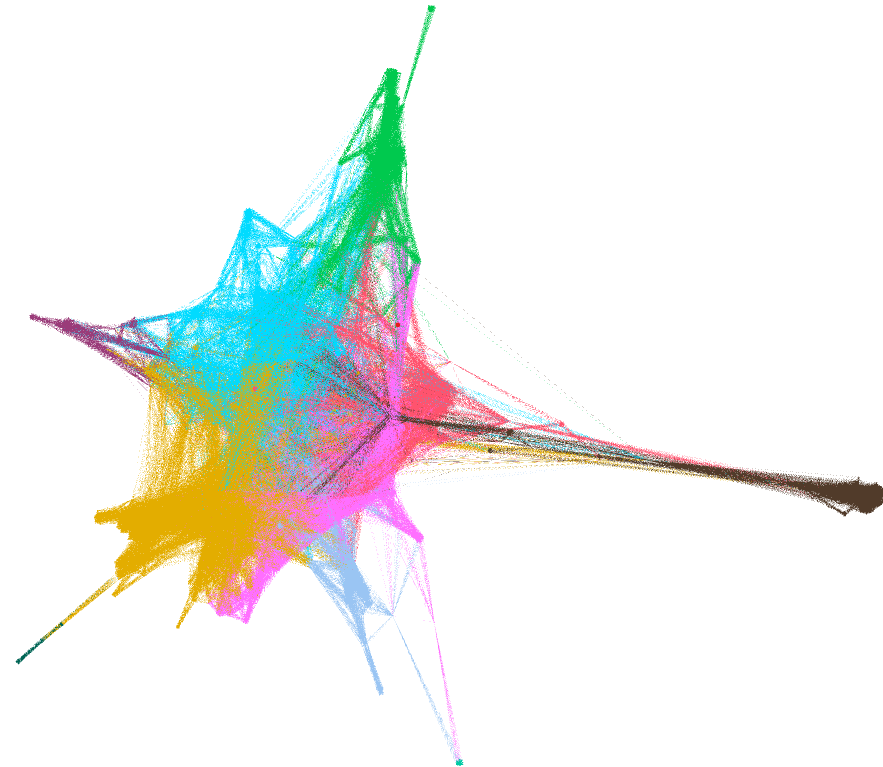

In [47]:
display(Image(filename='images/bgnetp_res_1.png'))

In [48]:
# reading the network exported from Gephi tool
BGNetP_Louvain_res_1 = nx.read_gml(f"{networks_path}/BGNetP_res_1.gml")
for node in BGNetP_Louvain_res_1.nodes():
    current_class = BGNetP_Louvain_res_1.nodes[node]['ModularityClass']
    BGNetP.nodes[node]['ModularityClassRes1'] = int(current_class)


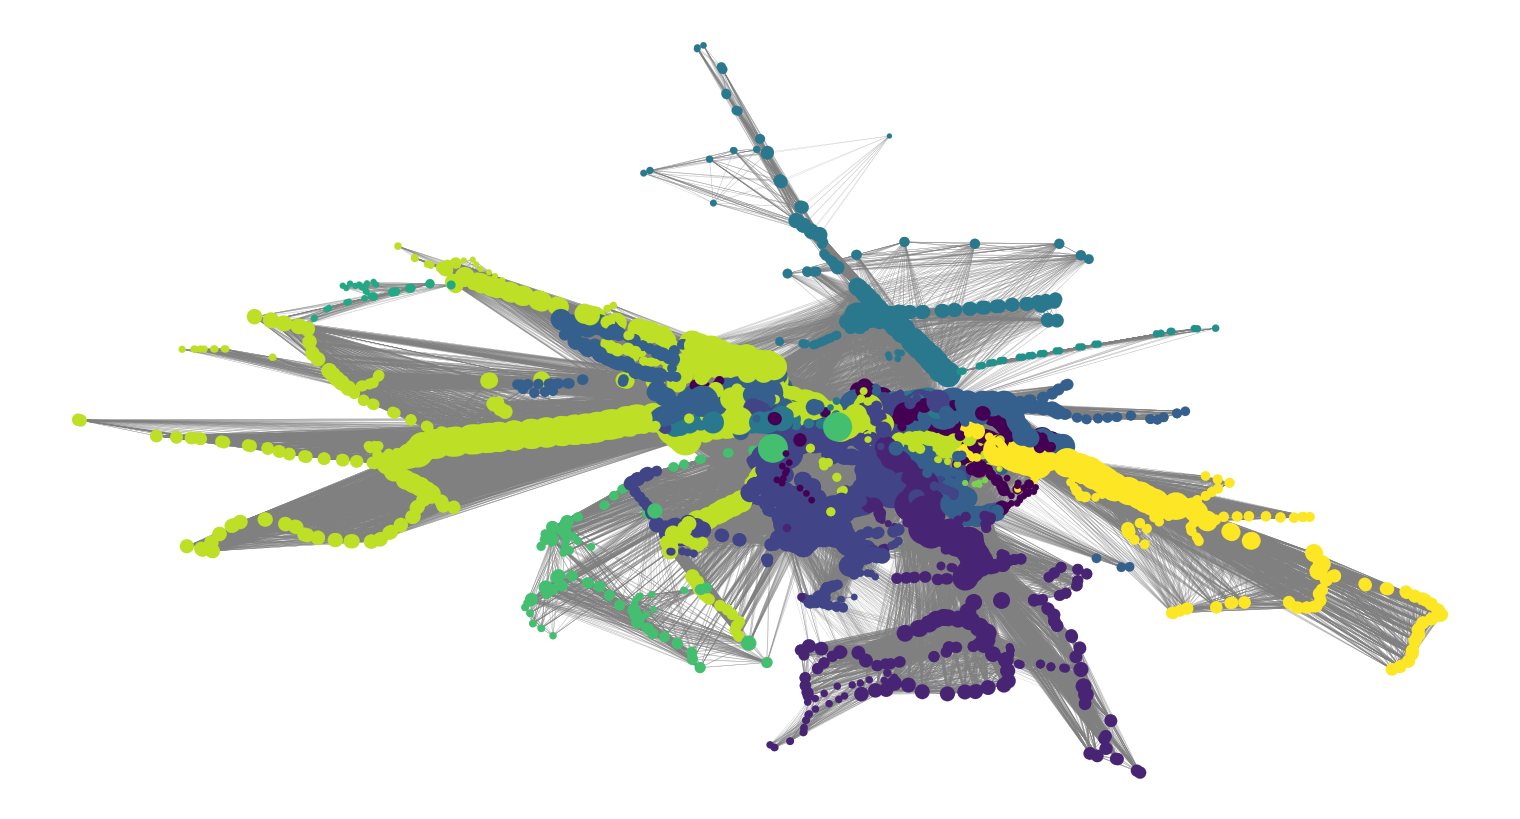

In [49]:
# Plot network to examine different communities
degrees = dict(BGNetP.degree(weight='weight'))

node_sizes = [ degrees[node] for node in BGNetP.nodes()]

node_positions = {node: (BGNetP.nodes[node]['stop_lon'], BGNetP.nodes[node]['stop_lat']) for node in BGNetP.nodes()}

plt.figure(figsize=(15, 8)) 
node_colors = [BGNetP.nodes[node]['ModularityClassRes1'] for node in BGNetP.nodes()]
nx.draw(BGNetP, pos=node_positions, with_labels=False, width=0.1, node_size=node_sizes, node_color=node_colors, edge_color='grey', linewidths=0.1, arrows=False)

plt.margins(0, 0)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


2) **Parameters:**<br>
Randomize: On <br>
Use edge weights: On<br>
Resolution: 5 <br>

    **Results:**
    Modularity: 0.252<br>
    Modularity with resolution: 4.135<br>
    Number of Communities: 4



In [50]:
# reading the network exported from Gephi tool
BGNetP_Louvain_res_5 = nx.read_gml(f"{networks_path}/BGNetP_res_5.gml")
for node in BGNetP_Louvain_res_5.nodes():
    current_class = BGNetP_Louvain_res_5.nodes[node]['ModularityClass']
    BGNetP.nodes[node]['ModularityClassRes5'] = int(current_class)


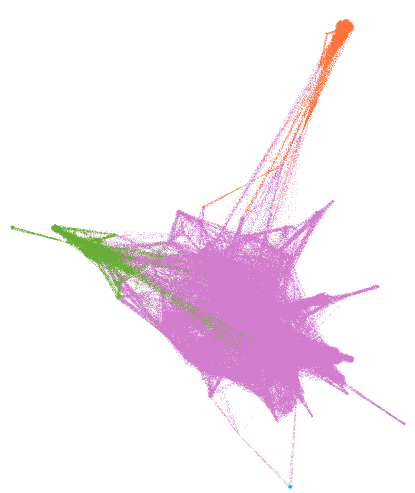

In [51]:
display(Image(filename='images/bgnetp_res_5.png'))

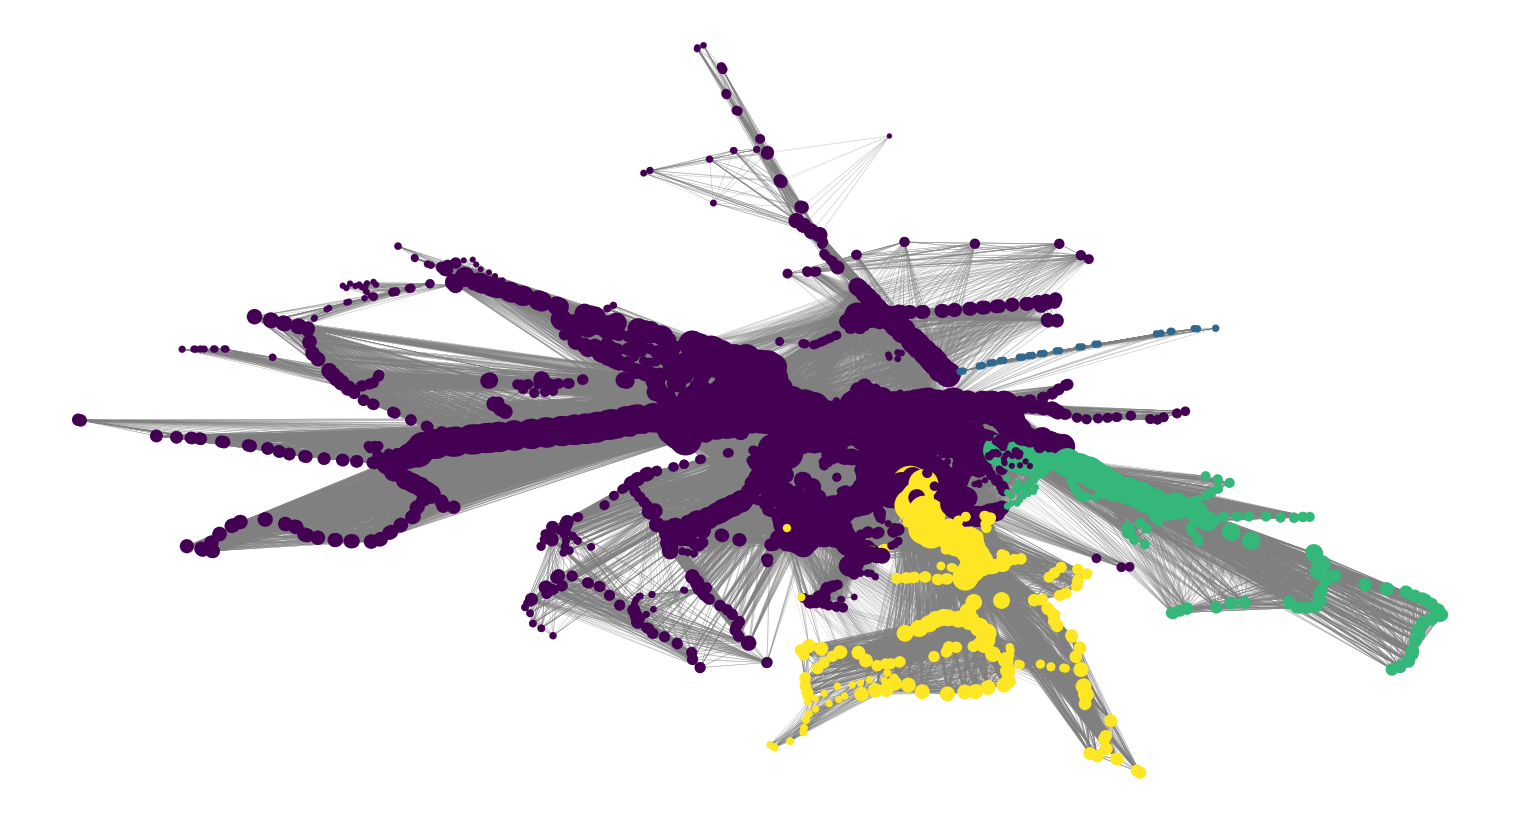

In [52]:
# Plot network to examine different communities
degrees = dict(BGNetP.degree(weight='weight'))

node_sizes = [ degrees[node] for node in BGNetP.nodes()]

node_positions = {node: (BGNetP.nodes[node]['stop_lon'], BGNetP.nodes[node]['stop_lat']) for node in BGNetP.nodes()}

plt.figure(figsize=(15, 8)) 
node_colors = [BGNetP.nodes[node]['ModularityClassRes5'] for node in BGNetP.nodes()]
nx.draw(BGNetP, pos=node_positions, with_labels=False, width=0.1, node_size=node_sizes, node_color=node_colors, edge_color='grey', linewidths=0.1)

plt.margins(0, 0)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


3) **Parameters:**<br>
Randomize: On <br>
Use edge weights: On<br>
Resolution: 0.5 <br>

    **Results:**
    Modularity: 0.585<br>
    Modularity with resolution: 0.251<br>
    Number of Communities: 18



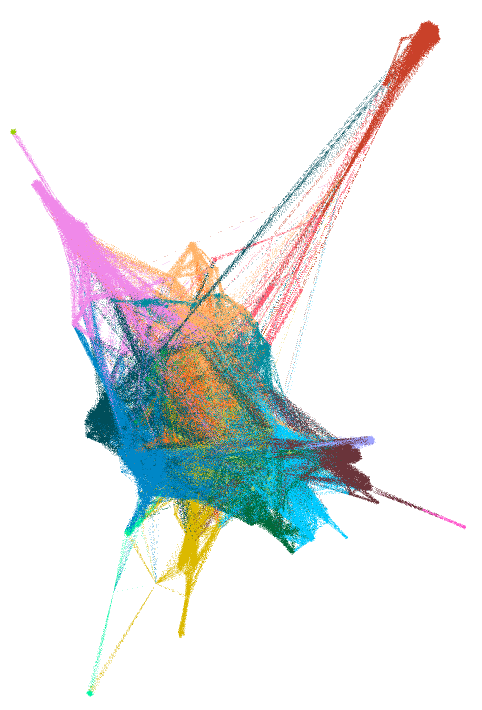

In [64]:
display(Image(filename='images/bgnetp_res_05.png'))


In [55]:
# reading the network exported from Gephi tool
BGNetP_Louvain_res_05 = nx.read_gml(f"{networks_path}/BGNetP_res_05.gml")
for node in BGNetP_Louvain_res_05.nodes():
    current_class = BGNetP_Louvain_res_05.nodes[node]['ModularityClass']
    BGNetP.nodes[node]['ModularityClassRes05'] = int(current_class)


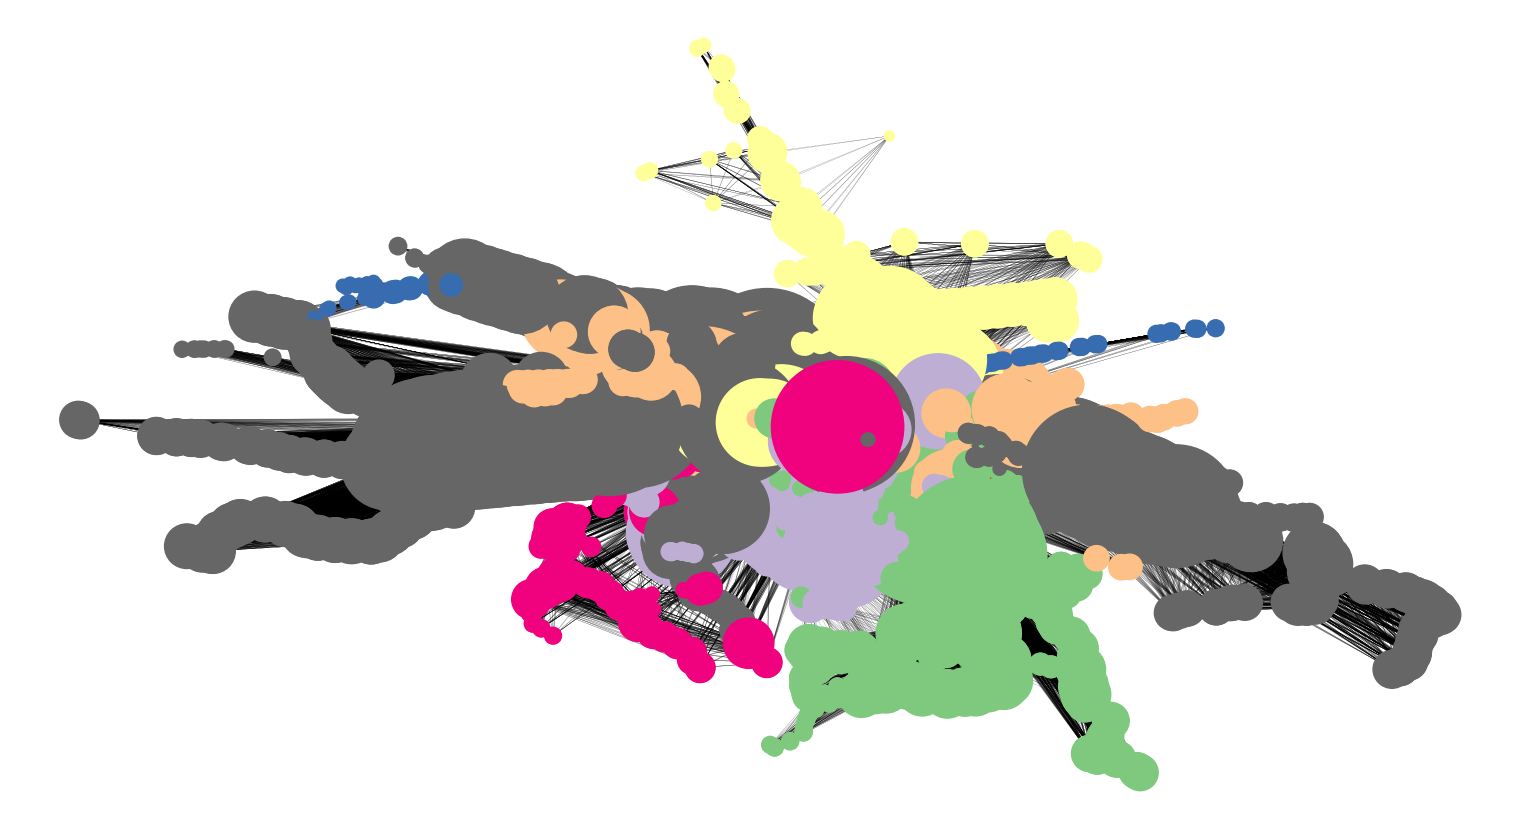

In [56]:
# Plot network to examine different communities
degrees = dict(BGNetP.degree(weight='weight'))

node_sizes = [ degrees[node] for node in BGNetP.nodes()]

node_positions = {node: (BGNetP.nodes[node]['stop_lon'], BGNetP.nodes[node]['stop_lat']) for node in BGNetP.nodes()}

cmap = plt.cm.get_cmap('Accent')
plt.figure(figsize=(15, 8)) 
node_colors = [BGNetP.nodes[node]['ModularityClassRes05'] for node in BGNetP.nodes()]
nx.draw(BGNetP, pos=node_positions, with_labels=False, width=0.1, node_size=node_sizes, node_color=node_colors, cmap=cmap, arrows=False)

plt.margins(0, 0)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.show()


comment: Higher value of resolution parameter will produce smaller numbere of clusters (communities), and those clusters will naturally be greater in size.

18. 